In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('default')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"amazon_sales_dataset.csv")

In [3]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
data.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [5]:
print('data has total {} rows and {} columns.'.format(data.shape[0],data.shape[1]))

data has total 128976 rows and 21 columns.


In [6]:
#print concise summary of the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [ ]:
data.drop(columns='index',inplace=True)

In [ ]:
data.isnull().sum().sort_values(ascending=False)

PendingS              128976
New                   128976
fulfilled-by           89713
Amount                  7800
currency                7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
Date                       0
Sales Channel              0
B2B                        0
Fulfilment                 0
Status                     0
Order ID                   0
dtype: int64

In [9]:
data.drop(columns=['PendingS','New'],inplace=True)

In [ ]:

null_values_df=pd.DataFrame(data.isnull().sum().sort_values(ascending=False)/(data.shape[0])*100)

top_null_df=null_values_df.nlargest(7,columns=0)
print(top_null_df)

                          0
fulfilled-by      69.557902
Amount             6.047637
currency           6.047637
ship-country       0.027137
ship-postal-code   0.027137
ship-state         0.027137
ship-city          0.027137


In [ ]:
data.drop('fulfilled-by',axis=1,inplace=True)

In [12]:
data[['Amount','currency','ship-country','ship-postal-code','ship-state','ship-city']].dtypes

Amount              float64
currency             object
ship-country         object
ship-postal-code    float64
ship-state           object
ship-city            object
dtype: object

In [13]:
data[['Amount','currency','ship-country','ship-postal-code','ship-state','ship-city']][:5]

,Amount,currency,ship-country,ship-postal-code,ship-state,ship-city
0,647.62,INR,IN,400081.0,MAHARASHTRA,MUMBAI
1,406.00,INR,IN,560085.0,KARNATAKA,BENGALURU
2,329.00,INR,IN,410210.0,MAHARASHTRA,NAVI MUMBAI
3,753.33,INR,IN,605008.0,PUDUCHERRY,PUDUCHERRY
4,574.00,INR,IN,600073.0,TAMIL NADU,CHENNAI


In [ ]:
data.dtypes

Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
dtype: object

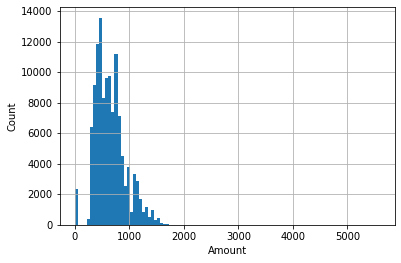

Amount column having skewness : 0.8859651066771677


In [15]:
plt.hist(x=data['Amount'],bins=100)
plt.grid()
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()
print('Amount column having skewness : {}'.format(data['Amount'].skew()))

In [ ]:
data['Amount']=data['Amount'].fillna(data['Amount'].median()) # hightly skewed thatswhy median used
data['currency']=data['currency'].fillna(data['currency'].mode()[0])# categorical feature thatswhy mode
data['ship-country']=data['ship-country'].fillna(data['ship-country'].mode()[0]) # categorical feature thatswhy mode
data['ship-postal-code']=data['ship-postal-code'].fillna(data['ship-postal-code'].median()) #right skewed thatswhy median
data['ship-state']=data['ship-state'].fillna(data['ship-state'].mode()[0])# categorical feature thatswhy mode
data['ship-city']=data['ship-city'].fillna(data['ship-city'].mode()[0])# categorical feature thatswhy mode

In [ ]:
print('there are total {} duplicate records present in dataset.'.format(data[data.duplicated()].shape[0]))
data.drop_duplicates(keep='first',inplace=True)

there are total 959 duplicate records present in dataset.


In [18]:
data.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False


In [ ]:
data.dtypes

Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
dtype: object

In [ ]:
data['Date']=pd.to_datetime(data['Date'])
data['ship-postal-code']=data['ship-postal-code'].astype(np.int64)

In [ ]:
data.describe()

,Qty,Amount,ship-postal-code
count,128017.000000,128017.000000,128017.000000
mean,0.905763,646.440855,463805.631697
std,0.311719,273.173905,191534.591520
min,0.000000,0.000000,110001.000000
25%,1.000000,459.000000,382418.000000
50%,1.000000,605.000000,500032.000000
75%,1.000000,771.000000,600024.000000
max,15.000000,5584.000000,989898.000000


In [ ]:
data.rename(columns={'Qty':"Quantity"},inplace=True)

In [23]:
data.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

1. Status Column : 

In [ ]:
data['Status'].value_counts()

Shipped                          77407
Shipped - Delivered to Buyer     28515
Cancelled                        18044
Shipped - Returned to Seller      1945
Shipped - Picked Up                970
Pending                            656
Pending - Waiting for Pick Up      277
Shipped - Returning to Seller      144
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            4
Shipped - Damaged                    1
Name: Status, dtype: int64

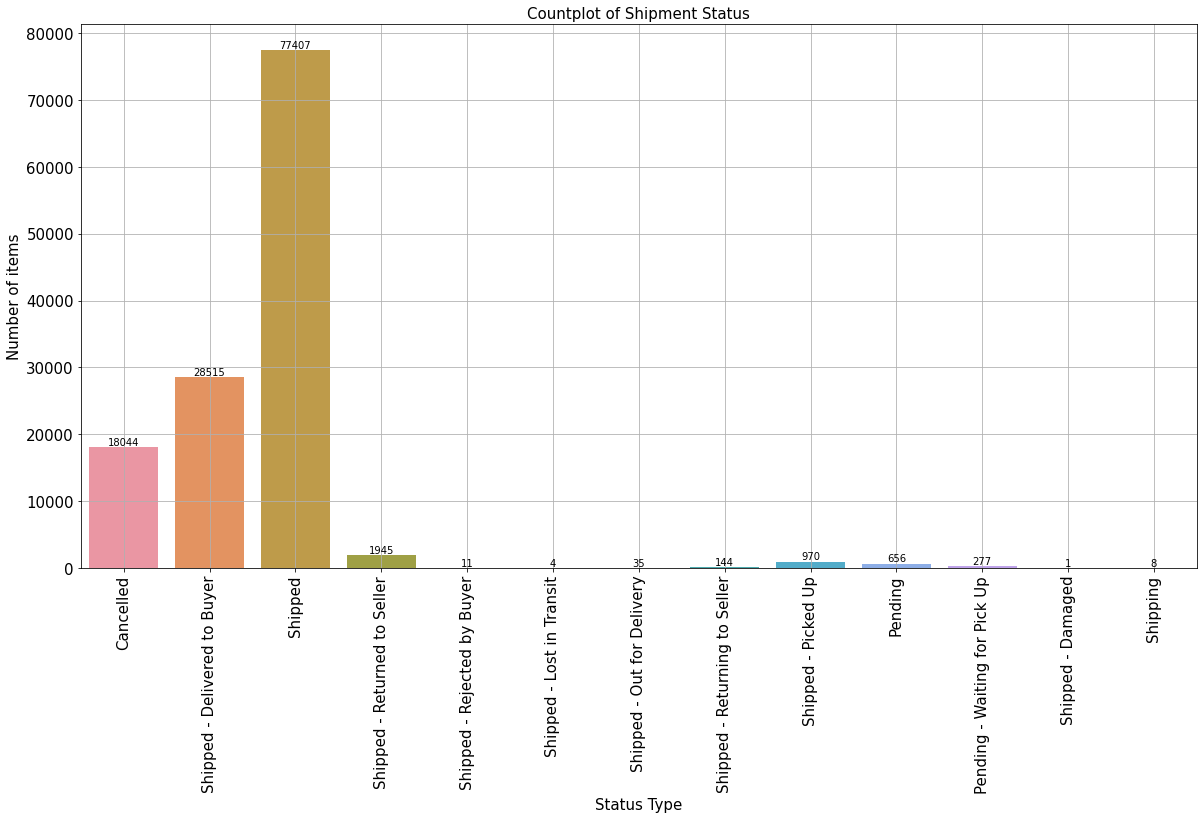

In [25]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Status',data=data,)
for val in ax.containers:
    ax.bar_label(val)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)
plt.xlabel('Status Type',size=15)
plt.ylabel('Number of items',size=15)
plt.grid()
plt.title('Countplot of Shipment Status',size=15)
plt.show()

2. Fulfilment

In [26]:
data['Fulfilment'].value_counts()

Amazon      89085
Merchant    38932
Name: Fulfilment, dtype: int64

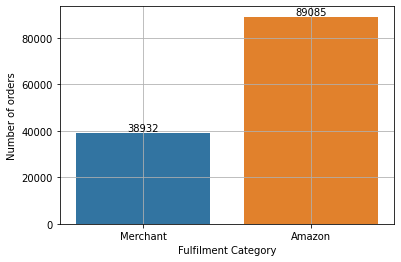

In [27]:
ax=sns.countplot(x='Fulfilment',data=data,)
for bar in ax.containers:
    ax.bar_label(bar)
plt.grid()
plt.xlabel('Fulfilment Category')
plt.ylabel('Number of orders')
plt.show()

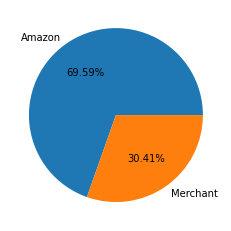

As we can see most of the orders are fullfilled by AMAZON and remaining order fullfilled by Merchant


In [28]:
plt.pie(x=data['Fulfilment'].value_counts().values,labels=data['Fulfilment'].value_counts().index,autopct='%0.2f%%')
plt.show()
print('As we can see most of the orders are fullfilled by AMAZON and remaining order fullfilled by Merchant')

3. Sales Channel : 

In [29]:
data['Sales Channel'].value_counts()

Amazon.in     127893
Non-Amazon       124
Name: Sales Channel, dtype: int64

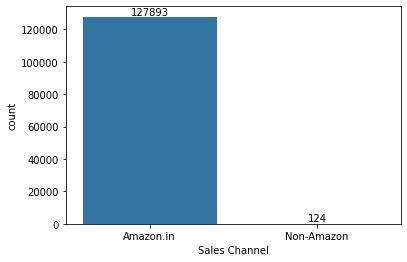

In [30]:
ax=sns.countplot(x='Sales Channel',data=data)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.show()

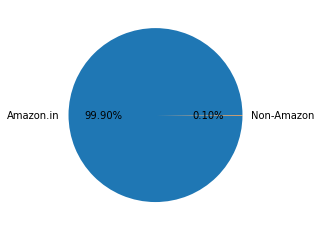

In [31]:
plt.pie(x=data['Sales Channel'].value_counts().values,labels=data['Sales Channel'].value_counts().index,autopct='%0.2f%%')
plt.show()

In [32]:
data['ship-service-level'].value_counts()

Expedited    88003
Standard     40014
Name: ship-service-level, dtype: int64

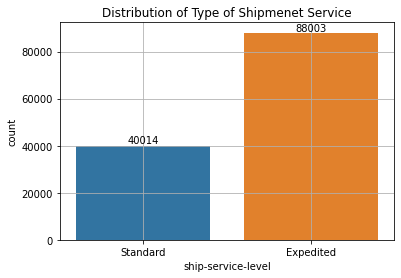

In [33]:
ax=sns.countplot(x='ship-service-level',data=data)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.title('Distribution of Type of Shipmenet Service')
plt.grid()
plt.show()

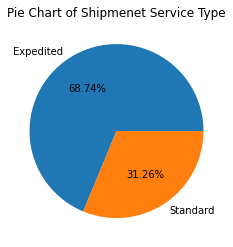

In [34]:
plt.pie(x=data['ship-service-level'].value_counts().values,labels=data['ship-service-level'].value_counts().index,autopct='%0.2f%%')
plt.title('Pie Chart of Shipmenet Service Type')
plt.show()

5. Category

In [ ]:
data['Category'].value_counts()

T-shirt     50042
Shirt       49352
Blazzer     15391
Trousers    10577
Perfume      1154
Wallet        913
Socks         429
Shoes         157
Watch           2
Name: Category, dtype: int64

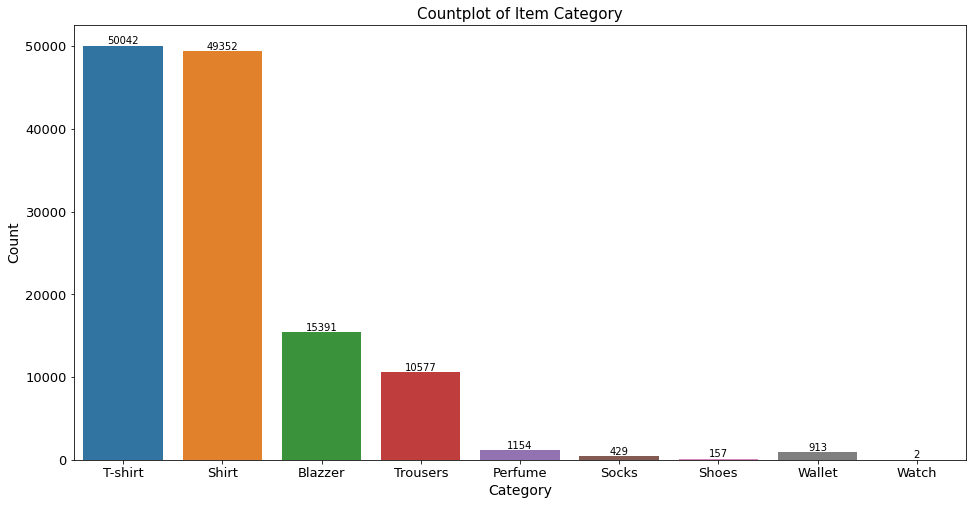

In [36]:
plt.figure(figsize=(16,8))
ax=sns.countplot(x='Category',data=data)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('Category',size=14)
plt.ylabel('Count',size=14)
plt.title('Countplot of Item Category',size=15)
plt.show()

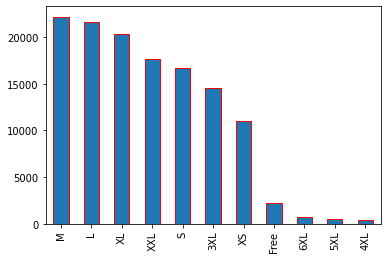

In [37]:
data['Size'].value_counts().plot(kind='bar',edgecolor='r')
plt.show()

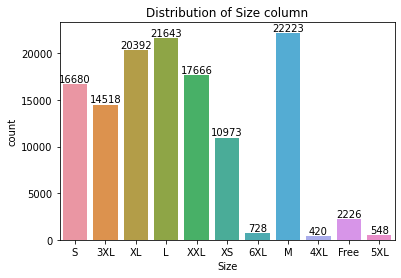

In [38]:
ax=sns.countplot(x='Size',data=data)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.title('Distribution of Size column')
plt.show()

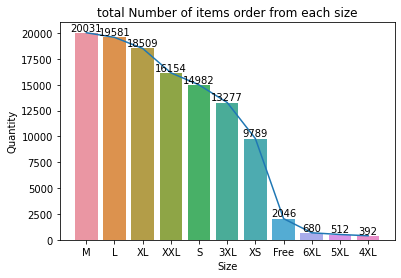

In [39]:
size_df=pd.DataFrame(data.groupby('Size')['Quantity'].sum().sort_values(ascending=False))

ax=sns.barplot(x=size_df.index,y='Quantity',data=size_df)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.plot(size_df['Quantity'])
plt.title('total Number of items order from each size')
plt.show()

In [40]:
data['Courier Status'].value_counts()

Shipped       108830
On the Way      6799
Unshipped       6644
Cancelled       5744
Name: Courier Status, dtype: int64

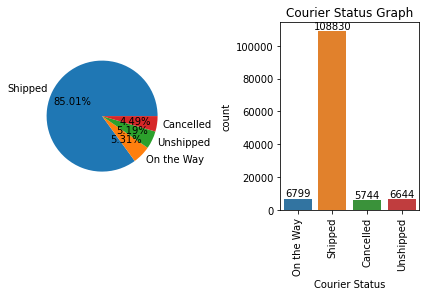

In [41]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)

ax1.pie(x=data['Courier Status'].value_counts().values,labels=data['Courier Status'].value_counts().index,autopct='%0.2f%%')
ax=sns.countplot(x='Courier Status',data=data,ax=ax2)
for bar_value in ax.containers:
    ax.bar_label(bar_value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Courier Status Graph')
plt.show()

In [42]:
data['Quantity'].value_counts()

1     115088
0      12543
2        339
3         32
4          9
5          2
15         1
9          1
13         1
8          1
Name: Quantity, dtype: int64

In [43]:
data['currency'].value_counts()/data.shape[0]*100

INR    100.0
Name: currency, dtype: float64

In [44]:
data.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

In [45]:
data['ship-country'].unique()

array(['IN'], dtype=object)

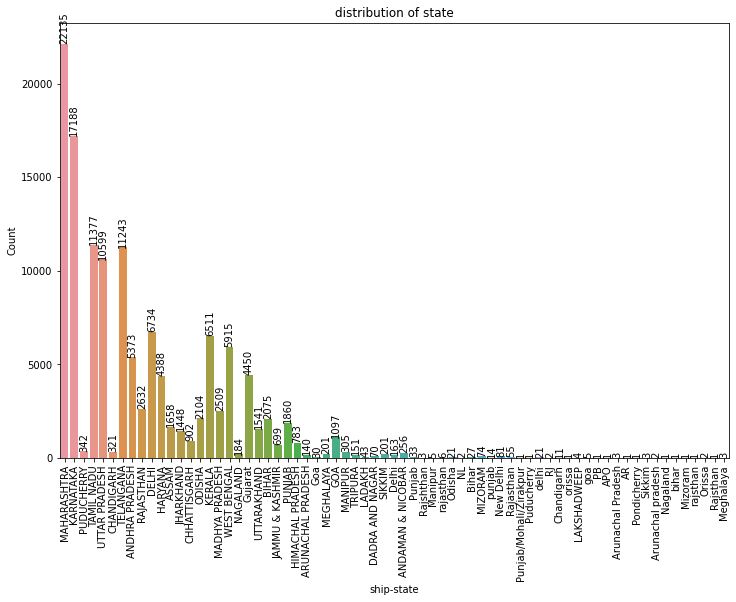

In [46]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=data, x='ship-state')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', rotation=90)
plt.xlabel('ship-state')
plt.ylabel('Count')
plt.title('distribution of state')
plt.xticks(rotation=90)
plt.show()

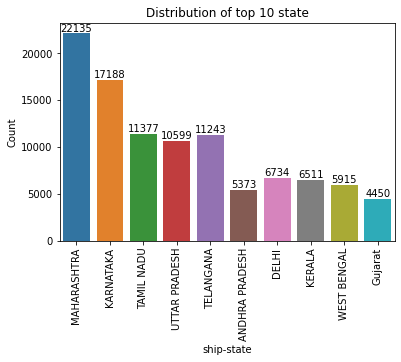

In [ ]:
top_10_state_index=data['ship-state'].value_counts().sort_values(ascending=False).head(10).index
ax=sns.countplot(data=data[data['ship-state'].isin(top_10_state_index)], x = 'ship-state')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('ship-state')
plt.ylabel('Count')
plt.title('Distribution of top 10 state')
plt.xticks(rotation  = 90)
plt.show()

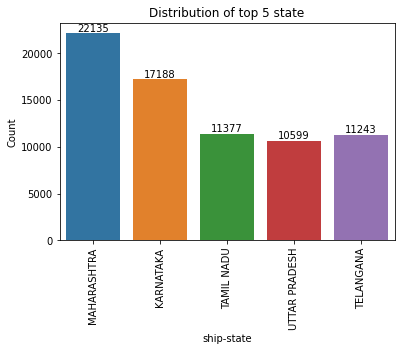

In [ ]:
top_5_state_index=data['ship-state'].value_counts().sort_values(ascending=False).head(5).index
ax=sns.countplot(data=data[data['ship-state'].isin(top_5_state_index)], x = 'ship-state')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('ship-state')
plt.ylabel('Count')
plt.title('Distribution of top 5 state')
plt.xticks(rotation  = 90)
plt.show()

In [ ]:
data['ship-city'].value_counts().sort_values(ascending=False).head(5)

BENGALURU    11153
HYDERABAD     8018
MUMBAI        6069
NEW DELHI     5752
CHENNAI       5376
Name: ship-city, dtype: int64

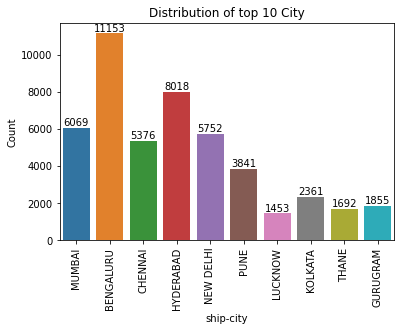

In [ ]:
top_10_city=data['ship-city'].value_counts().sort_values(ascending=False).head(10).index
ax=sns.countplot(x='ship-city',data=data[data['ship-city'].isin(top_10_city)])
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('ship-city')
plt.ylabel('Count')
plt.title('Distribution of top 10 City')
plt.xticks(rotation  = 90)
plt.show()

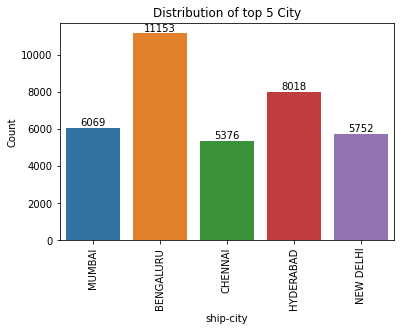

In [ ]:
top_5_city=data['ship-city'].value_counts().sort_values(ascending=False).head(5).index
ax=sns.countplot(x='ship-city',data=data[data['ship-city'].isin(top_5_city)])
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('ship-city')
plt.ylabel('Count')
plt.title('Distribution of top 5 City')
plt.xticks(rotation  = 90)
plt.show()

In [ ]:
data['ship-postal-code'].value_counts().sort_values(ascending=False).head(10)

201301    1000
122001     680
560037     628
560068     606
560076     574
560043     497
500072     487
401107     487
560100     486
560066     461
Name: ship-postal-code, dtype: int64

In [53]:
data['B2B'].value_counts()

False    127150
True        867
Name: B2B, dtype: int64

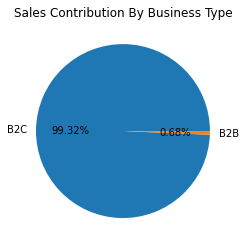

In [54]:
plt.pie(x=data['B2B'].value_counts().values,labels=['B2C','B2B'],autopct='%0.2f%%')
plt.title('Sales Contribution By Business Type')
plt.show()

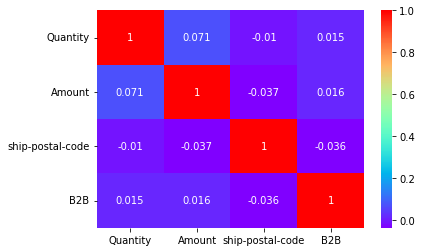

In [55]:
sns.heatmap(data.corr(),annot=True,cmap='rainbow')
plt.show()